# RDKit Utility: Find and Highlight the Maximum Substructure Between a Set of Molecules 

When analyzing a set of molecules, you might want to find the maximum substructure match between them. This utility function `SmilesMCStoGridImage` does that, displays the SMARTS substructure as a molecule, and displays all the molecules in a grid with their substructure highlighted and that core aligned.

In [28]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdFMCS

- Add legends: SMARTS for first, SMILES for rest. Possibly let user pass in a dictionary of SMILES: Name so can show Name in legend.
- Allow user to select verbose output, if want more than just picture--include SMARTS for MCS, and mols
- Find an example (that aligns cores) of passing a keyword argument through to rdFMCS.FindMCS

In [29]:
def SmilesMCStoGridImage(*smiles, align_core=True, **kwargs):
     mols = [Chem.MolFromSmiles(smile) for smile in smiles]
     res = rdFMCS.FindMCS(mols, **kwargs)
     mcs_mol = Chem.MolFromSmarts(res.smartsString)
     smarts = res.smartsString
     smart_mol = Chem.MolFromSmarts(smarts)
     smarts_and_mols = [smart_mol] + mols

     smarts_legend = "Max substructure match"
     mol_legends = ["" for mol in mols]
     legends =  [smarts_legend] + mol_legends
    
     matches = [""] + [mol.GetSubstructMatch(mcs_mol) for mol in mols]

     subms = [x for x in smarts_and_mols if x.HasSubstructMatch(mcs_mol)]

     Chem.Compute2DCoords(mcs_mol)

     if align_core:
          for m in subms:
               _ = Chem.GenerateDepictionMatching2DStructure(m, mcs_mol)

     return Draw.MolsToGridImage(smarts_and_mols, highlightAtomLists=matches, legends=legends)

## Example

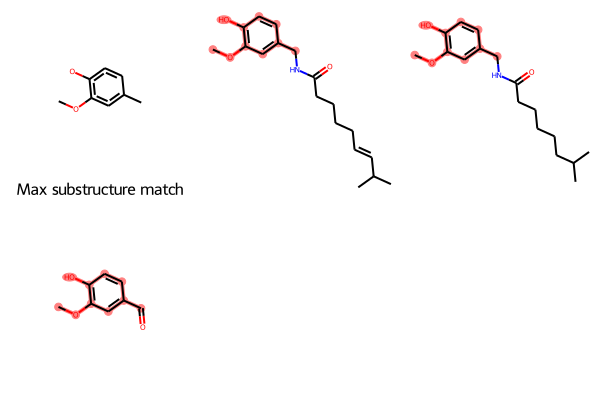

In [30]:
SmilesMCStoGridImage("O=C(NCc1cc(OC)c(O)cc1)CCCC/C=C/C(C)C", "CC(C)CCCCCC(=O)NCC1=CC(=C(C=C1)O)OC", "c1(C=O)cc(OC)c(O)cc1")

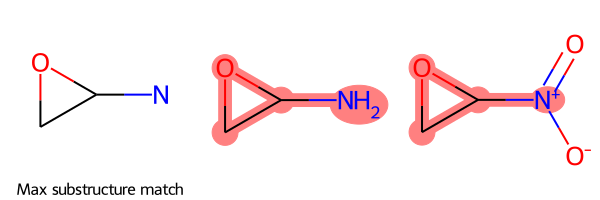

In [31]:
SmilesMCStoGridImage("NC1OC1", "C1OC1[N+](=O)[O-]")

## Caveat About Aligning Core
The SMARTS substructure match may not match the form of the molecule. For example, if you input two six-membered carbon rings, the SMARTS substructure match is a linear chain of six carbons. So if you align the molecules to that core, you will get some odd-looking "rings":

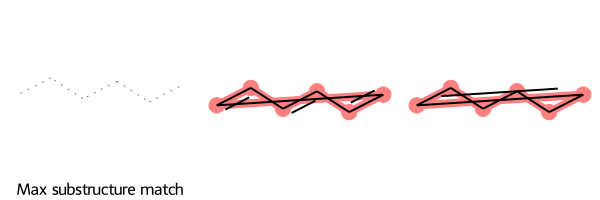

In [32]:
SmilesMCStoGridImage("c1ccccc1", "C1CCCC=C1")

To address this case, you can set `align_core=False` (its default value is `True`):

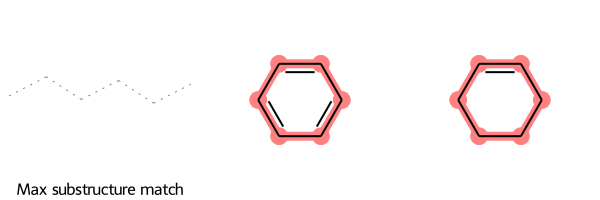

In [33]:
SmilesMCStoGridImage("c1ccccc1", "C1CCCC=C1", align_core=False)